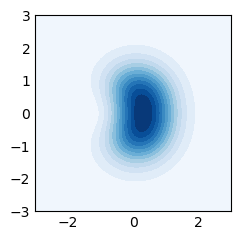

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint as r

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/r(2, 4) + X**r(1, 5) + Y**r(1, 5)) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 14)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sqrt(np.sin(R)**2 + np.cos(R)**2)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 200x200 with 1 Axes>

In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()


In [13]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])


In [72]:
import plotly.graph_objects as go
import numpy as np
import sympy as sp

fig = go.Figure()

x = np.linspace(-10, 10, 100)
y = x**2

fig.add_trace(go.Scatter(x=x, y=x**2, marker={'color': 'rgba(10, 30, 100, 0.5)'}, name='x²'))
fig.add_trace(go.Scatter(x=[-11, 11], y=[0, 0], marker={'color': 'rgba(50, 50, 50, 0.5)'}, name='xline'))
fig.add_trace(go.Scatter(x=[0, 0], y=[-11, 11], marker={'color': 'rgba(50, 50, 50, 0.5)'}, name='yline'))
fig.update_layout(xaxis_range=[-10, 10], yaxis_range=[-10, 10], xaxis=dict(dtick=1), yaxis=dict(dtick=1), width=800, height=800)
lines_to_hide = ['xline', 'yline']
for line_name in lines_to_hide:
    fig.update_traces(selector=dict(name=line_name), showlegend=False)
fig.show()

In [79]:
import numpy as np
import plotly.graph_objects as go

def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(t, a, b):
    return a + t * (b - a)

def grad(hash, x, y, z):
    h = hash & 15
    u = x if h < 8 else y
    v = y if h < 8 else x
    return (u if (h & 1) == 0 else -u) + (v if (h & 2) == 0 else -v)

def generate_perlin_noise_3d(width, height, depth, scale, octaves, persistence, lacunarity):
    world = np.zeros((width, height, depth))
    offset = np.random.rand(3) * 1000  # Random offset for noise generation
    
    for x in range(width):
        for y in range(height):
            for z in range(depth):
                frequency = 1
                amplitude = 1
                noise_value = 0

                for _ in range(octaves):
                    sample_x = (x + offset[0]) / scale * frequency
                    sample_y = (y + offset[1]) / scale * frequency
                    sample_z = (z + offset[2]) / scale * frequency
                    p = np.array([sample_x, sample_y, sample_z])

                    int_p = p.astype(int)
                    f = p - int_p

                    n000 = grad(int_p[0], int_p[1], int_p[2], int_p[0])
                    n001 = grad(int_p[0], int_p[1], int_p[2] + 1, int_p[0])
                    n010 = grad(int_p[0], int_p[1] + 1, int_p[2], int_p[0])
                    n011 = grad(int_p[0], int_p[1] + 1, int_p[2] + 1, int_p[0])
                    n100 = grad(int_p[0] + 1, int_p[1], int_p[2], int_p[0])
                    n101 = grad(int_p[0] + 1, int_p[1], int_p[2] + 1, int_p[0])
                    n110 = grad(int_p[0] + 1, int_p[1] + 1, int_p[2], int_p[0])
                    n111 = grad(int_p[0] + 1, int_p[1] + 1, int_p[2] + 1, int_p[0])

                    fade_f = np.array([fade(f[0]), fade(f[1]), fade(f[2])])

                    n00 = lerp(fade_f[0], n000, n100)
                    n01 = lerp(fade_f[0], n001, n101)
                    n10 = lerp(fade_f[0], n010, n110)
                    n11 = lerp(fade_f[0], n011, n111)
                    n0 = lerp(fade_f[1], n00, n10)
                    n1 = lerp(fade_f[1], n01, n11)
                    noise = lerp(fade_f[2], n0, n1)

                    noise_value += noise * amplitude
                    amplitude *= persistence
                    frequency *= lacunarity

                world[x][y][z] = noise_value

    return world

width = 64
height = 64
depth = 64
scale = 700.0  # Increase this value for larger-scale features
octaves = 6
persistence = 0.5
lacunarity = 2.0

perlin_noise_3d = generate_perlin_noise_3d(width, height, depth, scale, octaves, persistence, lacunarity)

x_vals = np.linspace(0, width - 1, width)
y_vals = np.linspace(0, height - 1, height)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

fig = go.Figure(data=[go.Surface(z=perlin_noise_3d[32], colorscale='Viridis')])  # Display a different slice for z

fig.update_layout(
    title="3D Perlin Noise",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()




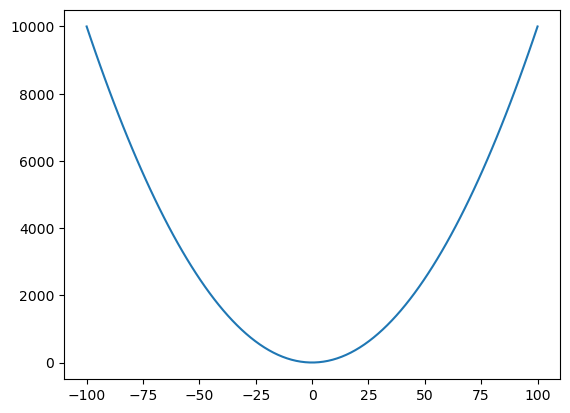

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100, 100, 100)
y = x**2

plt.plot(x, y)